In [1]:
# Required Python Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 
import pdb

# File Paths
IPHONE_DATA_PATH = "/Users/joh/Desktop/מדמ״ח/Final_Project_Data/CSV/AlliphoneData.csv"
ONEPLUS_DATA_PATH = "/Users/joh/Desktop/מדמ״ח/Final_Project_Data/CSV/AllOneplusData.csv"
ALL_DATA_PATH = "/Users/joh/Desktop/מדמ״ח/Final_Project_Data/CSV/All_Data.csv"
LABELED_BY_DEVICE = "/Users/joh/Desktop/מדמ״ח/Final_Project_Data/CSV/labeled_by_device.csv"
NEW_FEATURES = "/Users/joh/Desktop/מדמ״ח/Final_Project_Data/CSV/newfeature.csv"
ALL_COMBINED_FEATURES = "/Users/joh/Desktop/מדמ״ח/Final_Project_Data/CSV/combined_features.csv"


In [2]:
# Headers
#HEADERS = ["packet_count", "mean_packet_size", "sizevar", "std_fiat", "std_biat", "fpackets", "bpackets", "fbytes", "bbytes", "min_fiat", "min_biat", "max_fiat", "max_biat", "std_fiat", "std_biat", "mean_fiat", "mean_biat", "min_fpkt", "min_bpkt", "max_fpkt", "max_bpkt", "std_fpkt", "std_bpkt", "mean_fpkt", "mean_bpkt"]
newfeatures = []
for i in range(0,60):
     newfeatures.append('stat_'+str(i))
newfeatures.append('label')
HEADERS = newfeatures

HEADERS

['stat_0',
 'stat_1',
 'stat_2',
 'stat_3',
 'stat_4',
 'stat_5',
 'stat_6',
 'stat_7',
 'stat_8',
 'stat_9',
 'stat_10',
 'stat_11',
 'stat_12',
 'stat_13',
 'stat_14',
 'stat_15',
 'stat_16',
 'stat_17',
 'stat_18',
 'stat_19',
 'stat_20',
 'stat_21',
 'stat_22',
 'stat_23',
 'stat_24',
 'stat_25',
 'stat_26',
 'stat_27',
 'stat_28',
 'stat_29',
 'stat_30',
 'stat_31',
 'stat_32',
 'stat_33',
 'stat_34',
 'stat_35',
 'stat_36',
 'stat_37',
 'stat_38',
 'stat_39',
 'stat_40',
 'stat_41',
 'stat_42',
 'stat_43',
 'stat_44',
 'stat_45',
 'stat_46',
 'stat_47',
 'stat_48',
 'stat_49',
 'stat_50',
 'stat_51',
 'stat_52',
 'stat_53',
 'stat_54',
 'stat_55',
 'stat_56',
 'stat_57',
 'stat_58',
 'stat_59',
 'label']

In [3]:
def read_data(path):
    """
    Read the data into pandas dataframe
    :param path:
    :return:
    """
    data = pd.read_csv(path,sep='\t')
    return data

In [4]:
#read_data(INPUT_PATH)

In [5]:
def dataset_statistics(dataset):
    """
    Basic statistics of the dataset
    :param dataset: Pandas dataframe
    :return: None, print the basic statistics of the dataset
    """
    print (dataset.describe())

In [6]:
def handel_missing_values(dataset, missing_values_header, missing_label):
    """
    Filter missing values from the dataset
    :param dataset:
    :param missing_values_header:
    :param missing_label:
    :return:
    """
 
    return dataset[dataset[missing_values_header] != missing_label]

In [7]:
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """
 
    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],train_size=train_percentage)
    return train_x, test_x, train_y, test_y

In [8]:
def random_forest_classifier(features, target,max_depth,estimators, min_samples_split, max_features):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :param estimators:
    :param min_samples_split:
    :return: trained random forest classifier
    """
#     min_samples_split=5    
#     estimators = 32
    clf = RandomForestClassifier(n_estimators=estimators, max_depth=max_depth,min_samples_split=min_samples_split,max_features=max_features)
    clf.fit(features, target)
    return clf

In [9]:
def Decision_TreeClassifier(features, target, max_depth):
    """
    To train the Decision Tree Classifier with features and target data
    :param features:
    :param target:
    :param max_depth:
    :return: trained decision tree classifier
    """
    dtc = DecisionTreeClassifier(max_depth=max_depth)
    dtc.fit(features, target)
    return dtc

In [10]:
def knn_classifier(features, target, neighbors):
    """
    To train the knn classifier with features and target data
    :param features:
    :param target:
    :param neighbors:
    :return: trained knn classifier
    """
    cknn = KNeighborsClassifier(neighbors)
    cknn.fit(features, target)
    return cknn

In [11]:

# Load the csv file into pandas dataframe
iphone_dataset = read_data(IPHONE_DATA_PATH)
oneplus_dataset = read_data(ONEPLUS_DATA_PATH)
all_dataset = pd.read_csv(ALL_DATA_PATH,sep=';')
os_labeled_dataset = read_data(LABELED_BY_DEVICE)
allfeat_dataset = read_data(ALL_COMBINED_FEATURES)
oldfeat_dataset = read_data(NEW_FEATURES)


# Get basic statistics of the loaded dataset
#dataset_statistics(dataset)

# Filter missing values
#os_labeled_dataset = handel_missing_values(os_labeled_dataset, HEADERS[8], 0.0)
os_labeled_dataset = os_labeled_dataset.dropna()

train_x, test_x, train_y, test_y = split_dataset(allfeat_dataset, 0.7, HEADERS[1:-1], HEADERS[-1])

# Train and Test dataset size details
print ("Train_x Shape :: ", train_x.shape)
print ("Train_y Shape :: ", train_y.shape)
print ("Test_x Shape :: ", test_x.shape)
print ("Test_y Shape :: ", test_y.shape)

os_labeled_dataset.head()


Train_x Shape ::  (1792, 59)
Train_y Shape ::  (1792,)
Test_x Shape ::  (768, 59)
Test_y Shape ::  (768,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,packet_count,mean_packet_size,sizevar,std_fiat,std_biat,fpackets,bpackets,fbytes,bbytes,min_fiat,...,mean_biat,min_fpkt,min_bpkt,max_fpkt,max_bpkt,std_fpkt,std_bpkt,mean_fpkt,mean_bpkt,label
1,13.0,74.615385,251.923077,0.012089,0.037261,7.0,6.0,512.0,458.0,0.0,...,0.021651,54.0,66.0,97.0,97.0,16.876301,16.008331,73.142857,76.333333,0.0
2,12.0,70.000000,87.272727,0.009035,0.015349,6.0,6.0,444.0,396.0,0.0,...,0.008262,66.0,66.0,90.0,66.0,12.393547,0.000000,74.000000,66.000000,0.0
6,62.0,228.064516,253287.077737,0.954217,0.028234,35.0,27.0,4588.0,9552.0,0.0,...,0.010618,54.0,54.0,583.0,3509.0,131.818139,736.516036,131.085714,353.777778,0.0
7,82.0,250.024390,241619.875941,0.012083,0.012914,45.0,37.0,6900.0,13602.0,0.0,...,0.005917,66.0,66.0,912.0,2842.0,201.004636,684.371056,153.333333,367.621622,0.0
8,81.0,358.790123,244592.267901,0.288886,0.055841,44.0,37.0,16086.0,12976.0,0.0,...,0.030683,54.0,66.0,1247.0,3303.0,377.542686,610.868501,365.590909,350.702703,0.0


In [12]:
from matplotlib.legend_handler import HandlerLine2D

def TrainTestpltShow(values, train_results, test_results, valueName):
    line1, = plt.plot(values, train_results,'b', label="Train Accuracy")
    line2, = plt.plot(values, test_results, 'r', label="Test Accuracy")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('Accuracy')
    plt.xlabel(valueName)
    plt.show()

In [13]:
def show_best_accuracy(train_results,test_results,parameters):
    max_train_accuracy = 0
    max_test_accuracy = 0
    best_test_param = 0
    index = 0
    for n in parameters:
        if(train_results[index] >= max_train_accuracy):
            max_train_accuracy = train_results[index]
            
        if(test_results[index] >= max_test_accuracy):
            max_test_accuracy = test_results[index]
            best_test_param = n
        index+=1
        
    print("max train accuracy :: ",max_train_accuracy)
    print("max test accuracy :: ",max_test_accuracy)
    print("best test param :: ",best_test_param)


In [14]:
def print_confusion_matrix(classifier):
    predictions = classifier.predict(test_x)
    print (" Confusion matrix ", confusion_matrix(test_y, predictions))



max train accuracy ::  1.0
max test accuracy ::  0.9921875
best test param ::  100


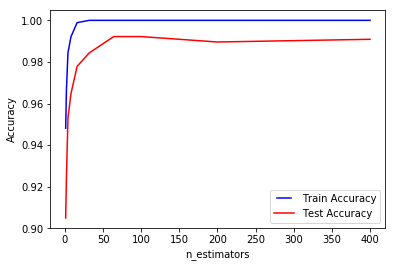

In [15]:
# Create random forest classifier instance
# Accuracy depending to number of estimators.
#max_depth,estimators, min_samples_split, max_features
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400]
min_sample_split = 4
train_results = []
test_results = []
for n in n_estimators:
    trained_model_rf = random_forest_classifier(train_x, train_y,10, n, min_sample_split,1)
    ac_train = accuracy_score(train_y, trained_model_rf.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_rf.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)
    
show_best_accuracy(train_results,test_results,n_estimators)
TrainTestpltShow(n_estimators, train_results, test_results, "n_estimators")

# predictions = trained_model_rf.predict(test_x)
# for i in range(0, 100):
#     if (i%10 == 0):
#         print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))

# print ("\n")
# print ("Train Accuracy :: ", accuracy_score(train_y, trained_model_rf.predict(train_x)))
# print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
# print (" Confusion matrix ", confusion_matrix(test_y, predictions))

In [38]:
# Create random forest classifier instance
# Accuracy depending to min samples splite value.
n_estimators = 100
min_samples_splits = list(range(2,30)) #np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for val in min_samples_splits:
    trained_model_rf = random_forest_classifier(train_x, train_y, n_estimators, val)
    ac_train = accuracy_score(train_y, trained_model_rf.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_rf.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)

show_best_accuracy(train_results,test_results,min_samples_splits)
TrainTestpltShow(min_samples_splits, train_results, test_results, "min_samples_splits")

TypeError: random_forest_classifier() missing 2 required positional arguments: 'min_samples_split' and 'max_features'

max train accuracy ::  1.0
max test accuracy ::  0.87109375
best test param ::  13


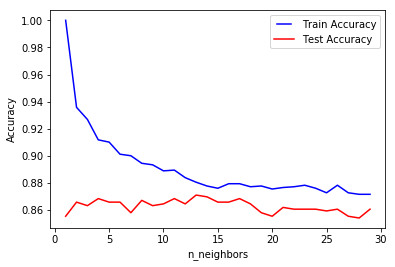

In [16]:
# Create knn classifier instance
# accuracy depending to number of neighbors (1 to 30)
neighbors = list(range(1,30))
train_results = []
test_results = []

for n in neighbors:
    trained_model_knn = knn_classifier(train_x, train_y, n)
    ac_train = accuracy_score(train_y, trained_model_knn.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_knn.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)

show_best_accuracy(train_results,test_results,neighbors)
TrainTestpltShow(neighbors, train_results, test_results, "n_neighbors")
    
# for i in range(0, 100):
#     if (i%10 == 0):
#         print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))

# print ("\n")
# print ("neighbors :",neighbors)
# print ("Train Accuracy :: ", accuracy_score(train_y, trained_model_knn.predict(train_x)))
# print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
# print (" Confusion matrix ", confusion_matrix(test_y, predictions))

max train accuracy ::  1.0
max test accuracy ::  0.9986979166666666
best test param ::  32.0


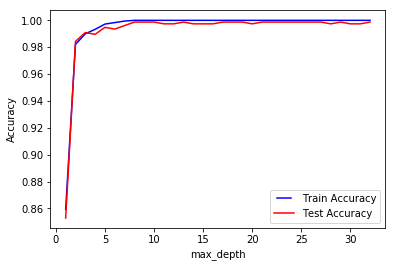

In [17]:
# Create decision tree classifier instance
# accuracy depending to number of neighbors (1 to 30)
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for n in max_depths:
    trained_model_dt = Decision_TreeClassifier(train_x, train_y, n)
    ac_train = accuracy_score(train_y, trained_model_dt.predict(train_x))
    ac_test = accuracy_score(test_y, trained_model_dt.predict(test_x))
    train_results.append(ac_train)
    test_results.append(ac_test)
    
show_best_accuracy(train_results,test_results,max_depths)
TrainTestpltShow(max_depths, train_results, test_results, "max_depth")

In [71]:
#final compariason of the 3 classifier:

#decision-tree:
trained_model_dt = Decision_TreeClassifier(train_x, train_y, 10)
dt_ac_train = accuracy_score(train_y, trained_model_dt.predict(train_x))
dt_ac_test = accuracy_score(test_y, trained_model_dt.predict(test_x))

#random forest: max_depth=5, n_estimators=16,min_samples_split=2(default), max_features=1
trained_model_rf = random_forest_classifier(train_x, train_y, 10,16,4,1)
rf_ac_train = accuracy_score(train_y, trained_model_rf.predict(train_x))
rf_ac_test = accuracy_score(test_y, trained_model_rf.predict(test_x))

#knn:
trained_model_knn = knn_classifier(train_x, train_y, 3)
knn_ac_train = accuracy_score(train_y, trained_model_knn.predict(train_x))
knn_ac_test = accuracy_score(test_y, trained_model_knn.predict(test_x))

print("decision-tree: train accuracy = {}, test accuracy = {}".format(dt_ac_train , dt_ac_test))

decision-tree: train accuracy = 1.0, test accuracy = 0.9921875


In [54]:
print("decision-tree: train accuracy = {}, test accuracy = {}".format(dt_ac_train , dt_ac_test))
print_confusion_matrix(trained_model_dt)      
print("random forest: train accuracy = {}, test accuracy = {}".format(rf_ac_train , rf_ac_test))
print_confusion_matrix(trained_model_rf)      
print("KNN: train accuracy = {}, test accuracy = {}".format(knn_ac_train , knn_ac_test))
print_confusion_matrix(trained_model_knn)      

decision-tree: train accuracy = 1.0, test accuracy = 0.9908854166666666
 Confusion matrix  [[111   0   0]
 [  0 546   4]
 [  0   3 104]]
random forest: train accuracy = 0.9994419642857143, test accuracy = 0.9765625
 Confusion matrix  [[104   5   2]
 [  5 544   1]
 [  1   4 102]]
KNN: train accuracy = 0.9285714285714286, test accuracy = 0.8736979166666666
 Confusion matrix  [[ 73  28  10]
 [ 38 505   7]
 [  9   5  93]]
